In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrc0188


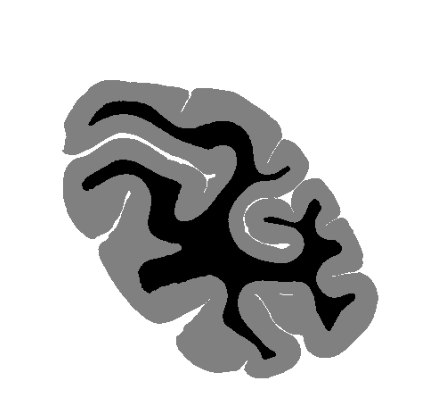

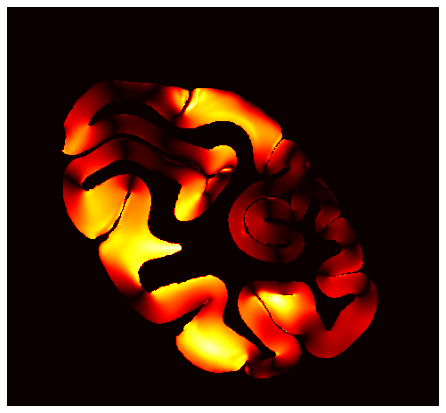

In [2]:
# Load quantity of interest and the cortex segmentation volume

target_file = "data/aa/volume/brain_visa/cutting_angle_6.nii.gz"
cortex_file = "data/aa/volume/cortex/cortex_6.h5"

###

from vervet1818_3d.correlation.functions import load_data
import pli.image as im

target_volume, target_spacing, cortex_volume, cortex_spacing = load_data(
    target_file,
    cortex_file
)

im.show(cortex_volume[:, 50, :])
im.show(target_volume[:, 50, :], cmap='hot')

100%|██████████| 117/117 [01:32<00:00,  1.26it/s]


Scale
Fit
Train & Train:
R² train: 0.62


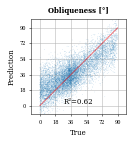

Train & Test:
R² test: -10.5


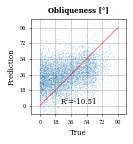

Test & Test:
Scale
Fit
R² tes testt: 0.471


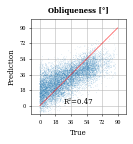

100%|██████████| 234/234 [00:03<00:00, 61.94it/s]


Scale
Fit
Train & Train:
R² train: 0.17


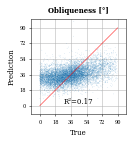

Train & Test:
R² test: -0.0239


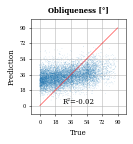

Test & Test:
Scale
Fit
R² tes testt: 0.156


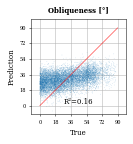

100%|██████████| 137/137 [00:30<00:00,  4.47it/s]


Scale
Fit
Train & Train:
R² train: 0.24


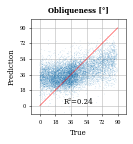

Train & Test:
R² test: -1.36e+07


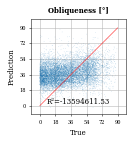

Test & Test:
Scale
Fit
R² tes testt: 0.135


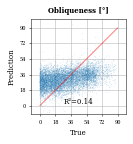

100%|██████████| 117/117 [00:23<00:00,  4.93it/s]


Scale
Fit
Train & Train:
R² train: 0.359


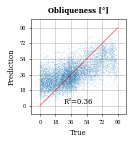

Train & Test:
R² test: 0.137


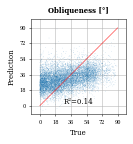

Test & Test:
Scale
Fit
R² tes testt: 0.272


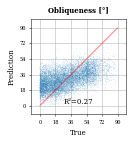

100%|██████████| 117/117 [00:22<00:00,  5.09it/s]


Scale
Fit
Train & Train:
R² train: 0.678


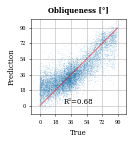

Train & Test:
R² test: 0.32


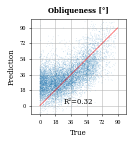

Test & Test:
Scale
Fit
R² tes testt: 0.572


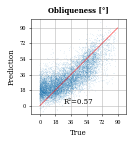

100%|██████████| 117/117 [00:22<00:00,  5.15it/s]


Scale
Fit
Train & Train:
R² train: 0.668


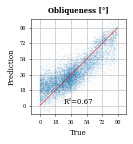

Train & Test:
R² test: 0.327


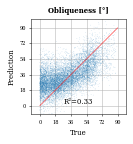

Test & Test:
Scale
Fit
R² tes testt: 0.569


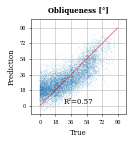

100%|██████████| 117/117 [00:27<00:00,  4.19it/s]


Scale
Fit
Train & Train:
R² train: 0.715


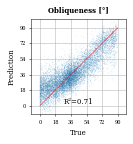

Train & Test:
R² test: 0.465


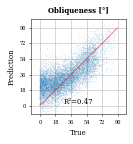

Test & Test:
Scale
Fit
R² tes testt: 0.616


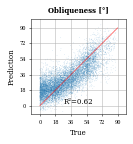

100%|██████████| 117/117 [00:23<00:00,  4.94it/s]


Scale
Fit
Train & Train:
R² train: 0.702


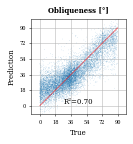

Train & Test:
R² test: 0.501


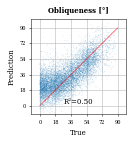

Test & Test:
Scale
Fit
R² tes testt: 0.644


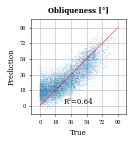

100%|██████████| 117/117 [00:23<00:00,  4.93it/s]


Scale
Fit
Train & Train:
R² train: 0.692


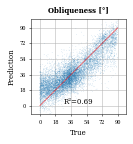

Train & Test:
R² test: 0.449


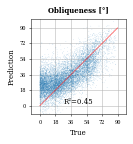

Test & Test:
Scale
Fit
R² tes testt: 0.604


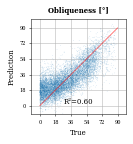

In [3]:
# Load feature maps and setup dictionary of section IDs as keys, starting at zero_section

title = "Obliqueness [°]"
name = "obliqueness"

# Define features
features_path = "data/aa/features/"

models = [
    "simclr-imagenet",
    "pli_glcm",
    "pli_sobel_histo",
    "resnet50_planes8_962-1083_same",
    "resnet50_planes8_962-1083_circle_small",
    "resnet50_planes8_962-1083_circle",
    "resnet50_planes8_962-1083_neighbor",
    "resnet50_planes8_962-1083_sphere_small",
    "resnet50_planes8_962-1083_sphere",
]

feature_groups = [
    "Features/2048",
    "Features/36",
    "Features/252",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
]

# Define Train/Test split
zero_section = 841
min_ix = 30
split_ix = 120
max_ix=  210

# Define training data
GM_CLASS = 2

train_count = 10_000
test_count = 10_000

seed = 299_792_458

# Visualization
target_range = (0, 90)
vis_range = (-10, 100)

subsample = 10_000

###

from vervet1818_3d.correlation.functions import load_features, aggregate_data, linear_evaluation
import os
import matplotlib.pyplot as plt

# Set the global font size
plt.rcParams.update({'font.family': 'serif'})

results = {}

for model, feature_group in zip(models, feature_groups):

    feature_dir = os.path.join(features_path, model)

    feature_maps = load_features(
        feature_dir,
        feature_group,
        zero_section,
        cortex_volume
    )

    test_indices = sorted([f for f in feature_maps.keys() if min_ix <= f < split_ix])
    train_indices = sorted([f for f in feature_maps.keys() if max_ix > f >= split_ix])

    train_features, train_target = aggregate_data(train_indices, train_count, seed, cortex_volume, feature_maps, target_volume, GM_CLASS)
    test_features, test_target = aggregate_data(test_indices, test_count, seed, cortex_volume, feature_maps, target_volume, GM_CLASS)

    r = linear_evaluation(
        train_features,
        train_target,
        test_features,
        test_target,
        target_range,
        vis_range,
        name,
        model,
        title,
        subsample,
    )

    results[model] = r

In [4]:
print("| Method | Train/Train R2\t| Train/Test R2\t| Test/Test R2\t|")
print("| --- | --- | --- | --- |")

for k in results.keys():
    print(f"| {k}\t | {results[k]['train_train_r2']:.3g}\t| {results[k]['train_test_r2']:.3g} | {results[k]['test_test_r2']:.3g} |")

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.62	| -10.5 | 0.471 |
| pli_glcm	 | 0.17	| -0.0239 | 0.156 |
| pli_sobel_histo	 | 0.24	| -1.36e+07 | 0.135 |
| resnet50_planes8_962-1083_same	 | 0.359	| 0.137 | 0.272 |
| resnet50_planes8_962-1083_circle_small	 | 0.678	| 0.32 | 0.572 |
| resnet50_planes8_962-1083_circle	 | 0.668	| 0.327 | 0.569 |
| resnet50_planes8_962-1083_neighbor	 | 0.715	| 0.465 | 0.616 |
| resnet50_planes8_962-1083_sphere_small	 | 0.702	| 0.501 | 0.644 |
| resnet50_planes8_962-1083_sphere	 | 0.692	| 0.449 | 0.604 |


With clip:

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.622	| -0.297 | 0.474 |
| pli_glcm	 | 0.17	| 0.082 | 0.156 |
| pli_sobel_histo	 | 0.24	| -0.122 | 0.136 |
| resnet50_planes8_962-1083_same	 | 0.359	| 0.137 | 0.272 |
| resnet50_planes8_962-1083_circle_small	 | 0.679	| 0.324 | 0.573 |
| resnet50_planes8_962-1083_circle	 | 0.67	| 0.33 | 0.57 |
| resnet50_planes8_962-1083_neighbor	 | 0.717	| 0.47 | 0.617 |
| resnet50_planes8_962-1083_sphere_small	 | 0.703	| 0.503 | 0.645 |
| resnet50_planes8_962-1083_sphere	 | 0.693	| 0.452 | 0.605 |


Without clip:

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.62	| -10.5 | 0.471 |
| pli_glcm	 | 0.17	| -0.0239 | 0.156 |
| pli_sobel_histo	 | 0.24	| -1.36e+07 | 0.135 |
| resnet50_planes8_962-1083_same	 | 0.359	| 0.137 | 0.272 |
| resnet50_planes8_962-1083_circle_small	 | 0.678	| 0.32 | 0.572 |
| resnet50_planes8_962-1083_circle	 | 0.668	| 0.327 | 0.569 |
| resnet50_planes8_962-1083_neighbor	 | 0.715	| 0.465 | 0.616 |
| resnet50_planes8_962-1083_sphere_small	 | 0.702	| 0.501 | 0.644 |
| resnet50_planes8_962-1083_sphere	 | 0.692	| 0.449 | 0.604 |
